In [1]:
!pipenv install wfdb pandas matplotlib scikit-learn

Installing wfdb...
Installation Succeeded
Installing pandas...
Installation Succeeded
Installing matplotlib...
Installation Succeeded
Installing scikit-learn...
Installation Succeeded
Installing dependencies from Pipfile.lock (945c37)...
All dependencies are now up-to-date!
Building requirements...
[    ] Locking packages...
Resolving dependencies...
[    ] Locking packages...
[=   ] Locking packages...
[==  ] Locking packages...
[=== ] Locking packages...
[ ===] Locking packages...
[  ==] Locking packages...
[   =] Locking packages...
[   =] Locking packages...
[  ==] Locking packages...
[ ===] Locking packages...
[====] Locking packages...
[=== ] Locking packages...
[==  ] Locking packages...
[    ] Locking packages...
[=   ] Locking packages...
[==  ] Locking packages...
[=== ] Locking packages...
[ ===] Locking packages...
[  ==] Locking packages...
[    ] Locking packages...
[   =] Locking packages...
[  ==] Locking packages...
[ ===] Locking packages...
[====] Locking packages...

Upgrading wfdb, pandas, matplotlib, scikit-learn in  dependencies.


In [6]:
!pipenv install seaborn

Installing seaborn...
Installation Succeeded
Installing dependencies from Pipfile.lock (945c37)...
All dependencies are now up-to-date!
Building requirements...
[    ] Locking packages...
Resolving dependencies...
[    ] Locking packages...
[=   ] Locking packages...
[==  ] Locking packages...
[=== ] Locking packages...
[ ===] Locking packages...
[  ==] Locking packages...
[    ] Locking packages...
[   =] Locking packages...
[  ==] Locking packages...
[ ===] Locking packages...
[====] Locking packages...
[=== ] Locking packages...
[=   ] Locking packages...
[    ] Locking packages...
[=   ] Locking packages...
[==  ] Locking packages...
[=== ] Locking packages...
[  ==] Locking packages...
[   =] Locking packages...
[    ] Locking packages...
[   =] Locking packages...
[  ==] Locking packages...
[ ===] Locking packages...
[=== ] Locking packages...
[==  ] Locking packages...
[=   ] Locking packages...
[    ] Locking packages...
[=   ] Locking packages...
[==  ] Locking packages...
[ =

Upgrading seaborn in  dependencies.


In [50]:
!pipenv install imbalanced-learn

Installing imbalanced-learn...
Installation Succeeded
Installing dependencies from Pipfile.lock (113dc2)...
All dependencies are now up-to-date!
Building requirements...
[    ] Locking packages...
Resolving dependencies...
[    ] Locking packages...
[=   ] Locking packages...
[==  ] Locking packages...
[=== ] Locking packages...
[ ===] Locking packages...
[  ==] Locking packages...
[    ] Locking packages...
[   =] Locking packages...
[  ==] Locking packages...
[ ===] Locking packages...
[====] Locking packages...
[=== ] Locking packages...
[=   ] Locking packages...
[    ] Locking packages...
[=   ] Locking packages...
[==  ] Locking packages...
[=== ] Locking packages...
[  ==] Locking packages...
[   =] Locking packages...
[    ] Locking packages...
[   =] Locking packages...
[  ==] Locking packages...
[ ===] Locking packages...
[====] Locking packages...
[==  ] Locking packages...
[=   ] Locking packages...
[    ] Locking packages...
[=   ] Locking packages...
[==  ] Locking packag

Upgrading imbalanced-learn in  dependencies.


In [25]:
!pipenv install streamlit

Installing streamlit...
Installation Succeeded
Installing dependencies from Pipfile.lock (9651a9)...
All dependencies are now up-to-date!
Building requirements...
[    ] Locking packages...
Resolving dependencies...
[    ] Locking packages...
[=   ] Locking packages...
[==  ] Locking packages...
[=== ] Locking packages...
[ ===] Locking packages...
[  ==] Locking packages...
[    ] Locking packages...
[   =] Locking packages...
[  ==] Locking packages...
[ ===] Locking packages...
[====] Locking packages...
[=== ] Locking packages...
[=   ] Locking packages...
[    ] Locking packages...
[=   ] Locking packages...
[==  ] Locking packages...
[=== ] Locking packages...
[ ===] Locking packages...
[   =] Locking packages...
[    ] Locking packages...
[   =] Locking packages...
[  ==] Locking packages...
[ ===] Locking packages...
[=== ] Locking packages...
[==  ] Locking packages...
[=   ] Locking packages...
[    ] Locking packages...
[=   ] Locking packages...
[==  ] Locking packages...
[

Upgrading streamlit in  dependencies.


In [2]:
# Step 1: Data Acquisition
# - Downloaded ECG data from PhysioNet (MIT-BIH database)
# - Extracted .dat, .hea, .atr files for signal and annotation
import os
import wfdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from IPython.display import FileLink

# Set local dataset path
base_folder = 'mit-bih-arrhythmia-database-1.0.0'
all_files = os.listdir(base_folder)
record_ids = sorted(set(f.split('.')[0] for f in all_files if f.endswith('.dat')))
record_ids[:20]


['100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '121']

In [3]:
# Step 2: Signal Preprocessing
# - Load ECG signals, filter noise, and normalize if needed
# - Keep 10 seconds per record (3600 samples at 360 Hz)
# Extract RR intervals and labels for EDA
combined_data = []
sample_rate = 360
valid_classes = ['N', 'L', 'R', 'A', 'V']
label_map = {'N': 'Normal', 'L': 'LBBB', 'R': 'RBBB', 'A': 'APB', 'V': 'PVC'}
for rid in record_ids:
    try:
        rec_path = os.path.join(base_folder, rid)
        record = wfdb.rdrecord(rec_path, sampto=3600)
        ann = wfdb.rdann(rec_path, 'atr', sampto=3600)
        
        # RR interval computation
        rr = pd.Series(ann.sample).diff() / sample_rate
        rr = rr.dropna().reset_index(drop=True)
        
        # Labels from annotation
        labels = pd.Series(ann.symbol[1:])
        df = pd.DataFrame({'RR_interval_sec': rr, 'label': labels})
        df = df[df['label'].isin(valid_classes)]
        df['class'] = df['label'].map(label_map)
        combined_data.append(df)
    except Exception as e:
        print(f"Skipped record {rid}: {e}")

In [4]:
# Step 3: Feature Extraction
# - Extracted RR intervals and created a feature matrix
# - Currently using only RR_interval_sec as input feature
final_df = pd.concat(combined_data, ignore_index=True)
final_df['class_encoded'] = final_df['class'].map({v: k for k, v in enumerate(label_map.values())})
final_df.head()

,RR_interval_sec,label,class,class_encoded
0,0.163889,N,Normal,0
1,0.813889,N,Normal,0
2,0.811111,N,Normal,0
3,0.788889,N,Normal,0
4,0.791667,N,Normal,0


In [5]:
print("Shape:", final_df.shape)
print("Missing values:\n", final_df.isnull().sum())
print("Unique classes:", final_df['class'].value_counts())

Shape: (555, 4)
Missing values:
 RR_interval_sec    0
label              0
class              0
class_encoded      0
dtype: int64
Unique classes: class
Normal    420
RBBB       53
LBBB       38
PVC        38
APB         6
Name: count, dtype: int64


C:\Users\abhis\AppData\Local\Temp\ipykernel_31196\2021186646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x='class', palette='Set2',legend=False)


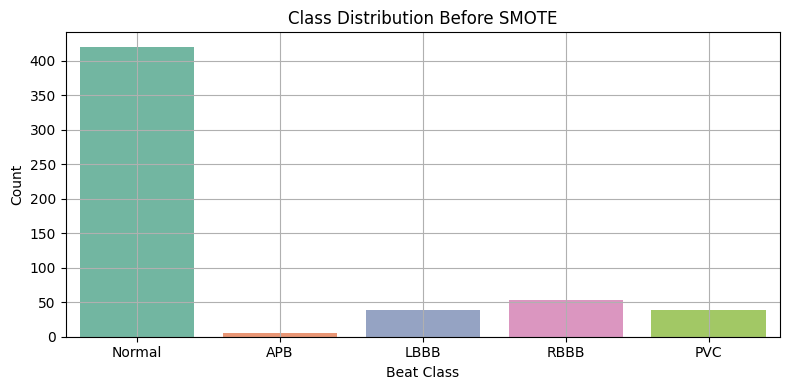

In [6]:
# see class distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=final_df, x='class', palette='Set2',legend=False)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Beat Class")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

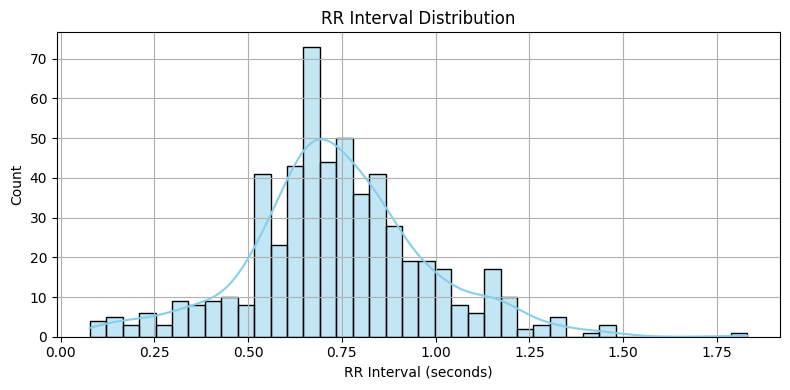

In [7]:
# RR interval histogram
plt.figure(figsize=(8, 4))
sns.histplot(final_df['RR_interval_sec'], bins=40, kde=True, color='skyblue')
plt.title("RR Interval Distribution")
plt.xlabel("RR Interval (seconds)")
plt.ylabel("Count")
plt.tight_layout()
plt.grid(True)
plt.show()

C:\Users\abhis\AppData\Local\Temp\ipykernel_31196\2791570286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x='class', y='RR_interval_sec', palette='Set3')


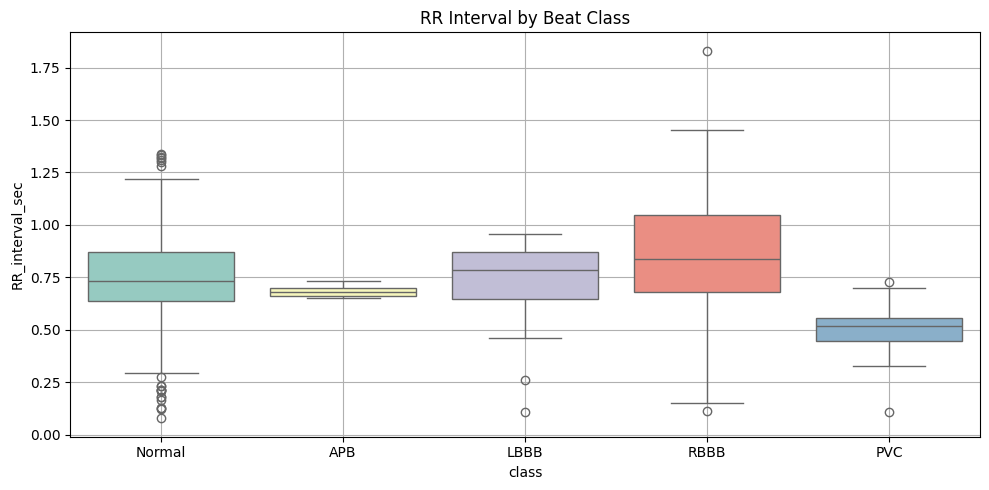

In [8]:
# RR interval boxplot per class
plt.figure(figsize=(10, 5))
sns.boxplot(data=final_df, x='class', y='RR_interval_sec', palette='Set3')
plt.title("RR Interval by Beat Class")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Step 4: Classification
# - SMOTE applied to balance class distribution
X = final_df[['RR_interval_sec']]
y = final_df['class_encoded']
print("Before SMOTE:", Counter(y))
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({0: 420, 2: 53, 1: 38, 4: 38, 3: 6})
After SMOTE: Counter({0: 420, 3: 420, 1: 420, 2: 420, 4: 420})


In [10]:
# - Trained Random Forest classifier and SVM using RR intervals
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib
X_train, X_test, y_train, y_test=train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=42)
clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
], voting='soft')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
joblib.dump(clf, "rf_xgb_model.pkl")

['rf_xgb_model.pkl']

In [11]:
# Step 5: Risk Evaluation
# - Calculate % of abnormal beats and define risk thresholds
abnormal_label = list(label_map.values()).index('Normal')
abnormal_count = sum(y_pred != abnormal_label)
total_count = len(y_pred)
abnormal_pct = abnormal_count / total_count
if abnormal_pct < 0.1:
    risk_level = 'Low'
elif abnormal_pct < 0.3:
    risk_level = 'Moderate'
else:
    risk_level = 'High'
print(f"Abnormal Beats: {abnormal_count}/{total_count} => Risk Level: {risk_level}")

Abnormal Beats: 339/420 => Risk Level: High


In [12]:
#step 6 : Risk Evaluation & Confusion matrix
# Classification report and confusion matrix
label_decoder = {v: k for k, v in enumerate(label_map.values())}
present_labels = sorted(set(y_test))
target_names = [k for k, v in label_decoder.items() if v in present_labels]
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

      Normal       0.58      0.52      0.55        91
        LBBB       0.58      0.56      0.57        80
        RBBB       0.51      0.50      0.51        76
         APB       0.76      0.82      0.79        94
         PVC       0.75      0.82      0.78        79

    accuracy                           0.65       420
   macro avg       0.64      0.64      0.64       420
weighted avg       0.64      0.65      0.64       420



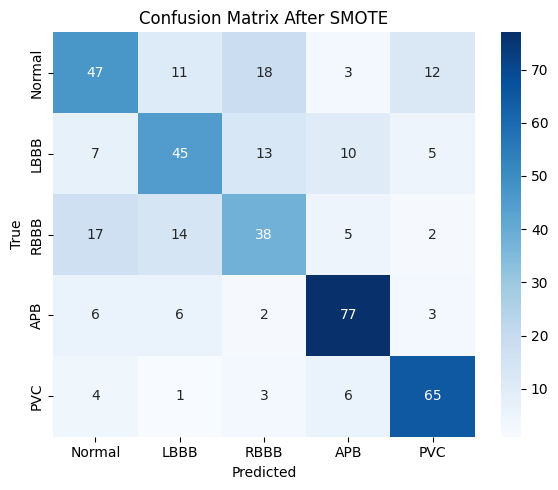

In [13]:
#Confusion Matrix
cmatrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix After SMOTE")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [14]:
# Export to CSV and create download link
results_df = pd.DataFrame({
    'RR_interval_sec': X_test['RR_interval_sec'].values,
    'True_Label': y_test.values,
    'Predicted_Label': y_pred
})
results_df.to_csv("ecg_predictions.csv", index=False)
FileLink("ecg_predictions.csv")

C:\Users\abhis\Desktop\projects\machinelearning\ecg_predictions.csv

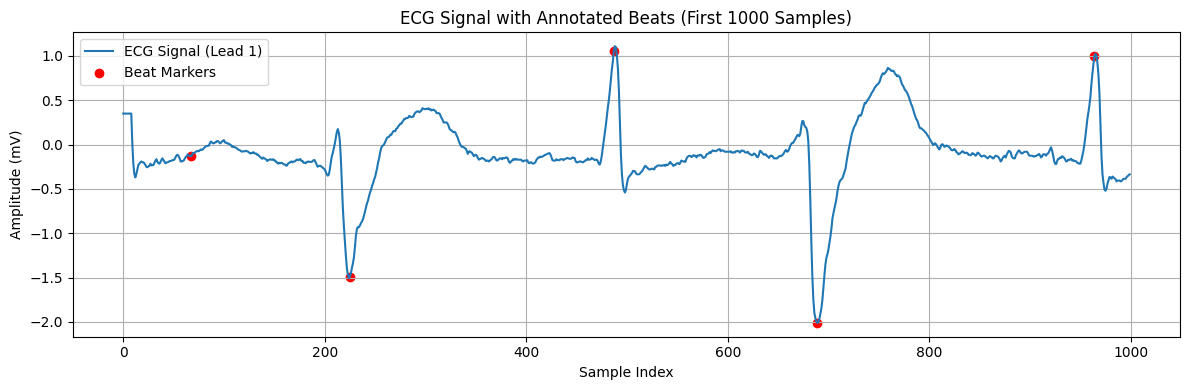

In [63]:
# 1. ECG Waveform Plot with Beat Markers
import wfdb
import matplotlib.pyplot as plt

record_path = 'mit-bih-arrhythmia-database-1.0.0/200'
record = wfdb.rdrecord(record_path, sampto=1000)
annotation = wfdb.rdann(record_path, 'atr', sampto=1000)

plt.figure(figsize=(12, 4))
plt.plot(record.p_signal[:, 0], label='ECG Signal (Lead 1)')
plt.scatter(annotation.sample, record.p_signal[annotation.sample, 0], color='red', label='Beat Markers')
plt.title("ECG Signal with Annotated Beats (First 1000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

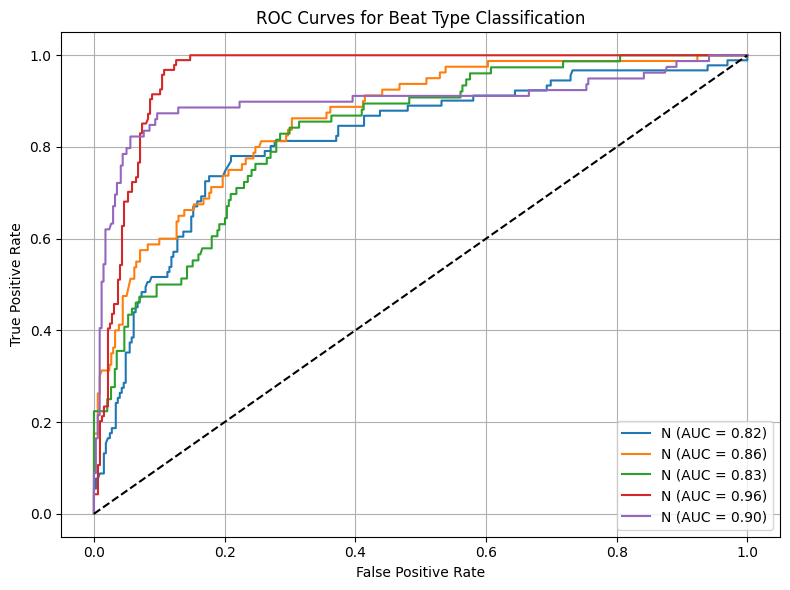

In [15]:
# 4. ROC Curve (Multi-Class)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# One-vs-all binarized ROC for 5 classes
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_score = clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for Beat Type Classification")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
%%writefile ecg_ui.py
# ECG Arrhythmia Detection - Streamlit UI

import streamlit as st
import wfdb
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import confusion_matrix

# Page setup
st.set_page_config(page_title="ECG Arrhythmia Detection", layout="wide")
st.title("🫀 ECG Arrhythmia Detection Interface")

# Path to dataset and model
base_path = "mit-bih-arrhythmia-database-1.0.0"
model_path = "rf_xgb_model.pkl"  # Pre-trained model path

# Load model
try:
    model = joblib.load(model_path)
except Exception as e:
    st.error(f"❌ Could not load model: {e}")
    st.stop()

# List available records dynamically
record_files = [f.split('.')[0] for f in os.listdir(base_path) if f.endswith('.dat')]
record_ids = sorted(list(set(record_files)))

# Sidebar: record and duration
st.sidebar.header("Select ECG Record & Duration")
record_id = st.sidebar.selectbox("ECG Record", record_ids)
duration = st.sidebar.slider("Duration (seconds)", 5, 60, 10)

# Load ECG
record_path = os.path.join(base_path, record_id)

try:
    samples = duration * 360
    record = wfdb.rdrecord(record_path, sampto=samples)
    annotation = wfdb.rdann(record_path, 'atr', sampto=samples)

    # Plot ECG
    st.subheader("📈 ECG Waveform with Beat Markers")
    fig, ax = plt.subplots(figsize=(12, 3))
    ax.plot(record.p_signal[:, 0], label="Lead 1")
    ax.scatter(annotation.sample, record.p_signal[annotation.sample, 0], color='red', label="R-peaks")
    ax.set_title(f"ECG {record_id} - {duration}s")
    ax.set_xlabel("Sample Index")
    ax.set_ylabel("Amplitude (mV)")
    ax.legend()
    ax.grid(True)
    st.pyplot(fig)

    # RR Intervals
    rr_intervals = pd.Series(annotation.sample).diff() / 360
    rr_intervals = rr_intervals.dropna().reset_index(drop=True)

    # Predict using real model
    X_input = pd.DataFrame({'RR_interval_sec': rr_intervals})
    predictions = model.predict(X_input)
    label_map = {0: "Normal", 1: "LBBB", 2: "RBBB", 3: "APB", 4: "PVC"}
    prediction_labels = [label_map[p] for p in predictions]

    result_df = pd.DataFrame({
        'RR_interval_sec': rr_intervals,
        'Predicted_Label': prediction_labels
    })

    st.subheader("🔍 Prediction Summary")
    st.write(result_df.head())

    # Risk Evaluation
    abnormal_classes = {"LBBB", "RBBB", "PVC", "APB"}
    abnormal_count = result_df['Predicted_Label'].isin(abnormal_classes).sum()
    total_count = len(result_df)
    abnormal_pct = abnormal_count / total_count

    if abnormal_pct < 0.1:
        st.success(f"✅ Risk Level: LOW ({abnormal_pct*100:.1f}% abnormal)")
    elif abnormal_pct < 0.3:
        st.warning(f"⚠️ Risk Level: MODERATE ({abnormal_pct*100:.1f}% abnormal)")
    else:
        st.error(f"🚨 Risk Level: HIGH ({abnormal_pct*100:.1f}% abnormal)")

    # Summary Chart
    st.subheader("📊 Beat Type Distribution")
    st.bar_chart(result_df['Predicted_Label'].value_counts())

    # Download
    st.subheader("⬇️ Download Results")
    csv = result_df.to_csv(index=False).encode('utf-8')
    st.download_button("Download CSV", csv, f"{record_id}_predictions.csv", "text/csv")

except Exception as e:
    st.error(f"❌ Error loading or processing ECG record: {e}")


Overwriting ecg_ui.py
